In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
data_dict = pickle.load(open('./data.pickle', 'rb'))

In [3]:
data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

In [4]:
data_flattened = []
for d in data:
    flattened_landmarks = np.concatenate([landmark.reshape(-1) for landmark in d])
    data_flattened.append(flattened_landmarks)

data_flattened = np.array(data_flattened)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(data_flattened, labels, test_size=0.2, shuffle=True, stratify=labels)


In [6]:
model = RandomForestClassifier()

model.fit(x_train, y_train)

RandomForestClassifier()

In [7]:
y_predict = model.predict(x_test)

In [8]:
score = accuracy_score(y_predict, y_test)

print('{}% of samples were classified correctly!'.format(score * 100))

99.82456140350877% of samples were classified correctly!


In [9]:
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')

print(f"Precision : {precision * 100:.2f}%")
print(f"Recall    : {recall * 100:.2f}%")
print(f"F1-Score  : {f1 * 100:.2f}%")

Precision : 99.83%
Recall    : 99.82%
F1-Score  : 99.82%


In [10]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        12
          15       1.00      1.00      1.00        20
          16       0.95      1.00      0.97        19
          17       1.00      1.00      1.00        20
          18       1.00      1.00      1.00         2
          19       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        20
          20       1.00      1.00      1.00        20
          21       1.00      1.00      1.00        20
          22       1.00      1.00      1.00        20
          23       1.00      1.00      1.00        20
          24       1.00    

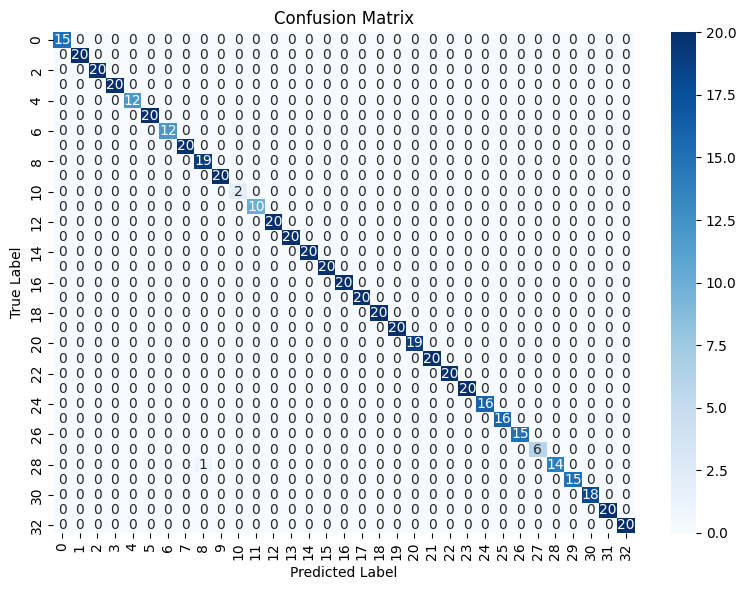

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

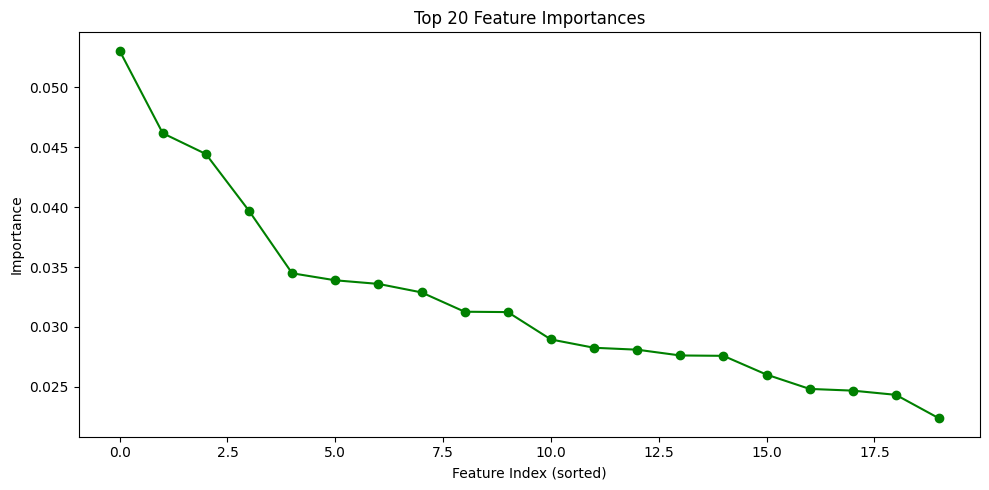

In [12]:
# Feature Importance Plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.plot(range(20), importances[indices[:20]], 'o-', color='green')
plt.title("Top 20 Feature Importances")
plt.xlabel("Feature Index (sorted)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [13]:
# Save model
with open('model.p', 'wb') as f:
    pickle.dump({'model': model}, f)